In [1]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
person_raw = pd.read_csv('../data/person-subset-2.5percent.csv')

In [3]:
execfile('../python/clean_data_person.py')

78320 rows before removing children
60357 rows after removing children


# Explore Relationships Between Variables

At a high level, we explore all of the continuous variables in a scatterplot matrix. Unfortunately, there does not seem to be much obvious linearity between the features. There are, however, many outliers and skewed data that we should be aware of.

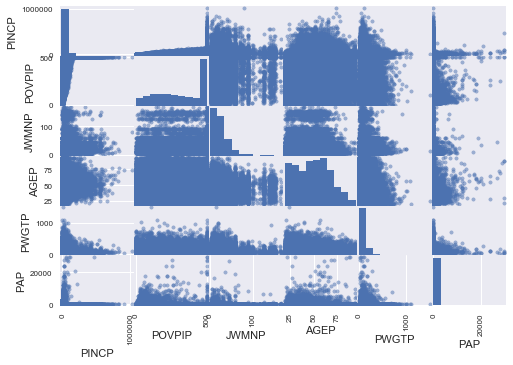

In [4]:
scatter_matrix(df[important_continuous_features])
plt.show()

One interesting comparison is between income and a person's weight (in pounds). Indeed, the densist grouping of individuals, whose reported income is greater than 150,000, also claim to way less than 200 pounds. Some very unlucky individual appears to weigh 1505 pounds.

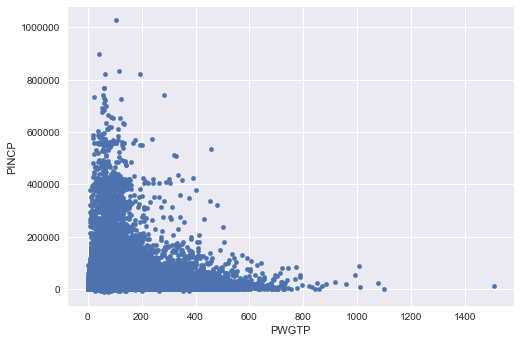

In [5]:
df.plot.scatter(x='PWGTP', y='PINCP')
plt.show()

When comparing income versus citizen status (`CIT`), we do see the largest difference, in the violin plots, for non-citizens.

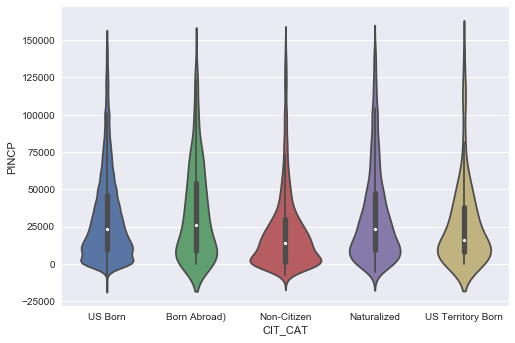

In [6]:
sns.violinplot(x="CIT", y="PINCP", data=df_small_income)
plt.show()

When we compare income versus age (`AGEP`), we see what appears to be a parabolic relationship between age and income. The highest density of high-income earners tends to come from people between ages 40-70. Again, we see the strange spike around age 92. Further evidence that something might be a bit off.

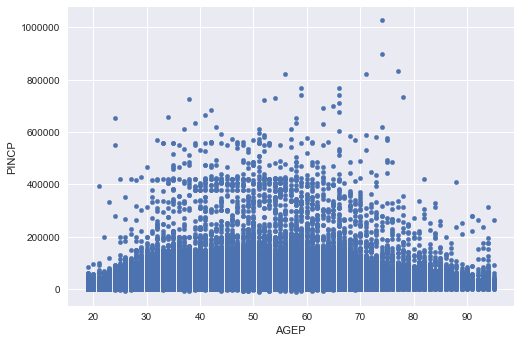

In [7]:
df.plot.scatter(x='AGEP', y='PINCP')
plt.show()

Taking a subset of the data, for when income is less than $150K, and looking at the proficiency of English versus a person's income, we can actually gain some decent incite into the stubbed distribution which comes from not knowing English at all.

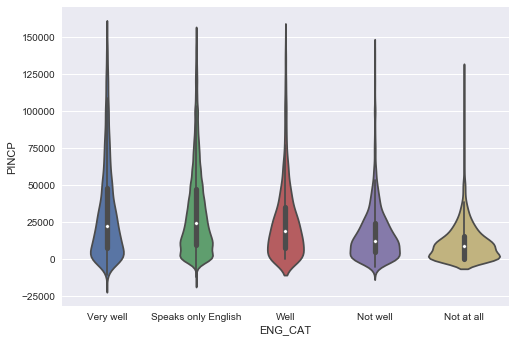

In [8]:
sns.violinplot(x="ENG", y="PINCP", data=df_small_income) 
plt.show()

Next we examine gender (`SEX`) versus income. A few interesting observations can be made. First off, it appears that the _individuals_ with highest income are female. Secondly, it apepars that all summary statistics (median, IQR, etc) give higher income to male individuals as a whole.

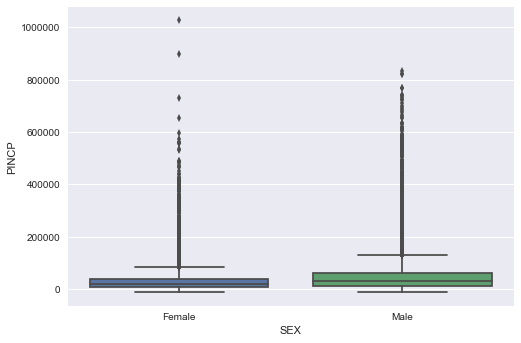

In [9]:
sns.boxplot('SEX', 'PINCP', data=df)
plt.show()